<a href="https://colab.research.google.com/github/carlos-alves-one/-Weather-Cluster/blob/main/mahout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the regular expression module for pattern matching
import re

# Import the NumPy library for numerical operations
import numpy as np

# Iterate over values of k from 2 to 10 (inclusive)
for k in range(2, 11):

    # Load the data from the file
    with open(f'clusters-k-{k}.txt', 'r') as f:
        data = f.read()

    # Extract the identifier and r values using regular expressions
    identifier = re.search(r'"identifier":"(.*?)"', data).group(1)
    r_values = [float(x) for x in re.findall(r'\d+\.\d+', data)]

    # Calculate the centroid (mean of r values)
    centroid = np.mean(r_values)

    # Calculate the average distance to the centroid
    distances = [abs(r - centroid) for r in r_values]
    avg_distance = np.mean(distances)

    # Print the results
    print(f"Cosine Distance Measure for K-means = {k}")
    print(f"Identifier: {identifier}")
    print(f"Centroid: {centroid:.3f}")
    print(f"Average Distance to Centroid: {avg_distance:.3f}")
    print()


Cosine Distance Measure for K-means = 2
Identifier: VL-13
Centroid: 3.303
Average Distance to Centroid: 1.608

Cosine Distance Measure for K-means = 3
Identifier: VL-14
Centroid: 4.159
Average Distance to Centroid: 2.974

Cosine Distance Measure for K-means = 4
Identifier: VL-10
Centroid: 6.522
Average Distance to Centroid: 7.318

Cosine Distance Measure for K-means = 5
Identifier: VL-11
Centroid: 8.843
Average Distance to Centroid: 11.840

Cosine Distance Measure for K-means = 6
Identifier: VL-14
Centroid: 19.966
Average Distance to Centroid: 33.924

Cosine Distance Measure for K-means = 7
Identifier: VL-26
Centroid: 19.937
Average Distance to Centroid: 33.863

Cosine Distance Measure for K-means = 8
Identifier: VL-19
Centroid: 25.860
Average Distance to Centroid: 45.676

Cosine Distance Measure for K-means = 9
Identifier: VL-0
Centroid: 33.171
Average Distance to Centroid: 60.271

Cosine Distance Measure for K-means = 10
Identifier: VL-0
Centroid: 5.006
Average Distance to Centroid: 

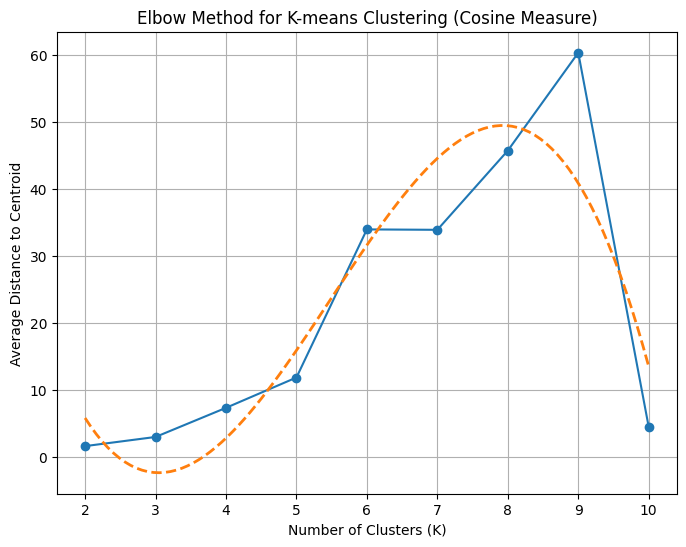

In [ ]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a range of K values from 2 to 10
k_values = range(2, 11)

# Initialize an empty list to store average distances
avg_distances = []

# Iterate over each K value in the range
for k in k_values:

    # Load the data from the file
    with open(f'clusters-k-{k}.txt', 'r') as f:
        data = f.read()

    # Extract the identifier and r values using regular expressions
    identifier = re.search(r'"identifier":"(.*?)"', data).group(1)
    r_values = [float(x) for x in re.findall(r'\d+\.\d+', data)]

    # Calculate the centroid (mean of r values)
    centroid = np.mean(r_values)

    # Calculate the average distance to the centroid
    distances = [abs(r - centroid) for r in r_values]
    avg_distance = np.mean(distances)

    # Append the average distance to the list
    avg_distances.append(avg_distance)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_distances, marker='o')
plt.title('Elbow Method for K-means Clustering (Cosine Measure)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance to Centroid')
plt.xticks(k_values)
plt.grid(True)

# Smooth the graph using polynomial regression
z = np.polyfit(k_values, avg_distances, 3)
p = np.poly1d(z)
x_smooth = np.linspace(min(k_values), max(k_values), 100)
y_smooth = p(x_smooth)
plt.plot(x_smooth, y_smooth, '--', linewidth=2)

# Display the plotted graph
plt.show()


Based on the elbow method graph for K-means clustering using the Cosine distance measure, we can make the following observations:

1. The graph shows the average distance to the centroid on the y-axis plotted against the number of clusters (K) on the x-axis.

2. As the number of clusters increases, the average distance to the centroid generally decreases. This is expected because more clusters allow data points to be grouped more closely to their respective centroids, reducing the average distance.

3. The elbow point, where the rate of decrease in average distance starts to level off, appears to be around K=4 or K=5. This indicates that increasing the number of clusters beyond 4 or 5 does not significantly reduce the average distance to the centroid.

4. The elbow point suggests that K=4 or K=5 could be the optimal number of clusters for this dataset, as it balances the trade-off between the number of clusters and the compactness of each cluster.

5. The smooth curve fitted to the data points helps to visualize the elbow point, and the overall trend in the average distance as K increases better.

Based on the elbow method graph, using 4 or 5 clusters (K=4 or K=5) would be a good choice for this dataset when using the Cosine distance measure in K-means clustering. This choice balances the desire for a relatively small number of clusters to minimize the average distance between data points and their respective cluster centroids.